# Planning Stage (Individual) - 43553866 Crystal Zhao (Group 4)

In [15]:
library(tidyverse)
library(broom)
library(modelr)
library(titanic)
library(repr)
library(leaps)
library(moderndive)

In [25]:
customer_data <- read.csv("marketing_campaign.csv", header = TRUE, sep="", stringsAsFactors = TRUE)

# Data Description:

### Dataset Selection: 

Dataset Name: Customer Personality Analysis

Dataset link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [26]:
dim (customer_data)

[1] 2440   29

### Description:
1. Number of observations (rows) is 2440.
2. Number of variables (columns) is 29.
3. Key Variables:

#### Customer Features:

ID (Customer's unique identifier)

Year_Birth (Customer’s birth year)

Education (Education Qualification of customer)

Marital_Status (Marital Status of customer)

Income (Customer's yearly household income)

Kidhome (Number of children in customer's household)

Teenhome (Number of teenagers in customer's household)

Dt_Customer (Date of customer's enrollment with the company)

Recency (Number of days since customer's last purchase)

#### Behavioural Features related to products:

MntWines (Amount spent on wine in the last 2 years)

MntFruits (Amount spent on fruits in the last 2 years)

MntMeatProducts (Amount spent on meat products in the last 2 years)

MntFishProducts (Amount spent on fish products in the last 2 years)

MntSweetProducts (Amount spent on sweet products in the last 2 years)

MntGoldProds (Amount spent on gold products in the last 2 years)

#### Promotion related:

NumDealsPurchases (Number of purchases made with discounts)

AcceptedCmp1 (Whether the customer accepted offers in the first campaign, 1 if TRUE, 0 if FALSE)

AcceptedCmp2 (Whether the customer accepted offers in the second campaign, 1 if TRUE, 0 if FALSE)

AcceptedCmp3 (Whether the customer accepted offers in the third campaign, 1 if TRUE, 0 if FALSE)

AcceptedCmp4 (Whether the customer accepted offers in the fourth campaign, 1 if TRUE, 0 if FALSE)

AcceptedCmp5 (Whether the customer accepted offers in the fifth campaign, 1 if TRUE, 0 if FALSE)

Response (Whether the customer responded to the last campaign, 1 if TRUE, 0 if FALSE)

Complain (Whether the customer lodged a complaint in the last 2 years, 1 if TRUE, 0 if FALSE)

#### Purchase behaviour location related:

NumWebPurchases (Number of purchases made through website)

NumCatalogPurchases (Number of purchases made through the catalogue)

NumStorePurchases (Number of purchases made through the store)

NumWebVisitsMonth (Number of visits made to website)

#### constant:

Z_CostContact (Z-score of Cost per contact)

Z_Revenue (Z-score of Revenue)

4. Data was collected from a marketing/retail company since it tracks customer information, customers' behaviours, and customers' purchases.

# Question:

#### How do customers' Education and marital status influence their purchase behaviours on fruits?

Response variable: MntFruits

Explanatory variables: Education and Marital_Status

The data will help me address the question of interest by plotting MntFruits vs. Education and plotting MntFruits vs. Income to see if there is an observed correlation. My question is focused primarily on inference, where the relationship between the variables will be understood clearly. 

# Exploratory Data Analysis and Visualization

In [57]:
head(customer_data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [58]:
customer_data_var <- customer_data %>%
    select(Education, Marital_Status, MntFruits )
head(customer_data_var)

,Education,Marital_Status,MntFruits
,<fct>,<fct>,<int>
1,Graduation,Single,88
2,Graduation,Single,1
3,Graduation,Together,49
4,Graduation,Together,4
5,PhD,Married,43
6,Master,Together,42


Warning message:
“Removed 200 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


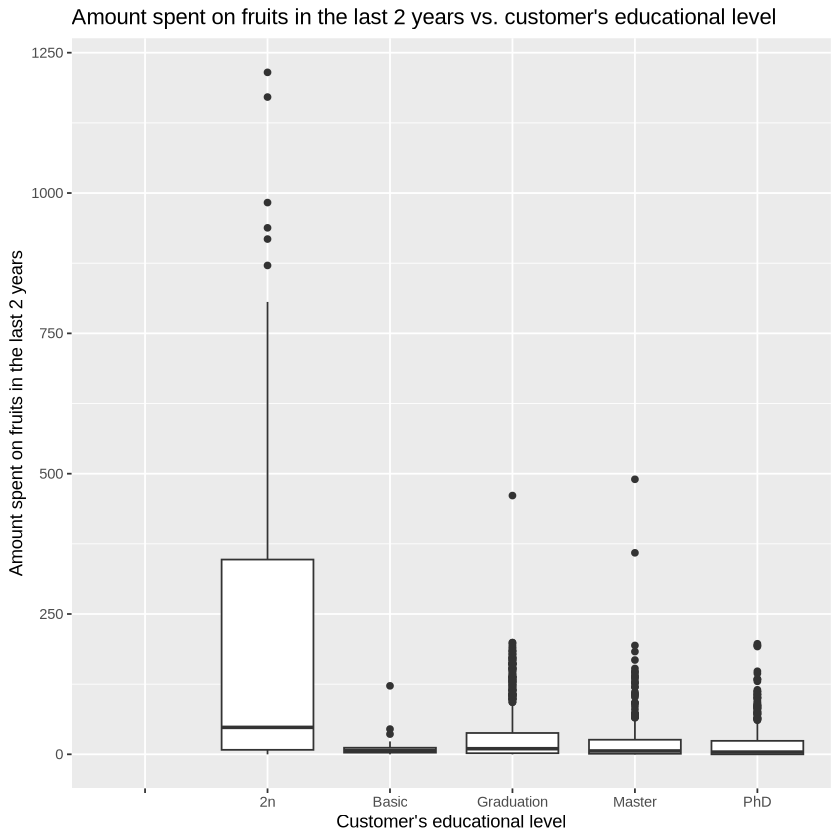

In [61]:
customer_data_education_plot <- customer_data_var %>%
    ggplot(aes(y = MntFruits , x = Education)) +
    geom_boxplot() +
    xlab("Customer's educational level") + 
    ylab("Amount spent on fruits in the last 2 years") +
    ggtitle("Amount spent on fruits in the last 2 years vs. customer's educational level")
customer_data_education_plot

This plot is relevant to address my question as it clearly states the behavior of response variable to different groups, which observation can be made easily: customer with 2n educational level tend to spend more on fruits.

Warning message:
“Removed 200 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


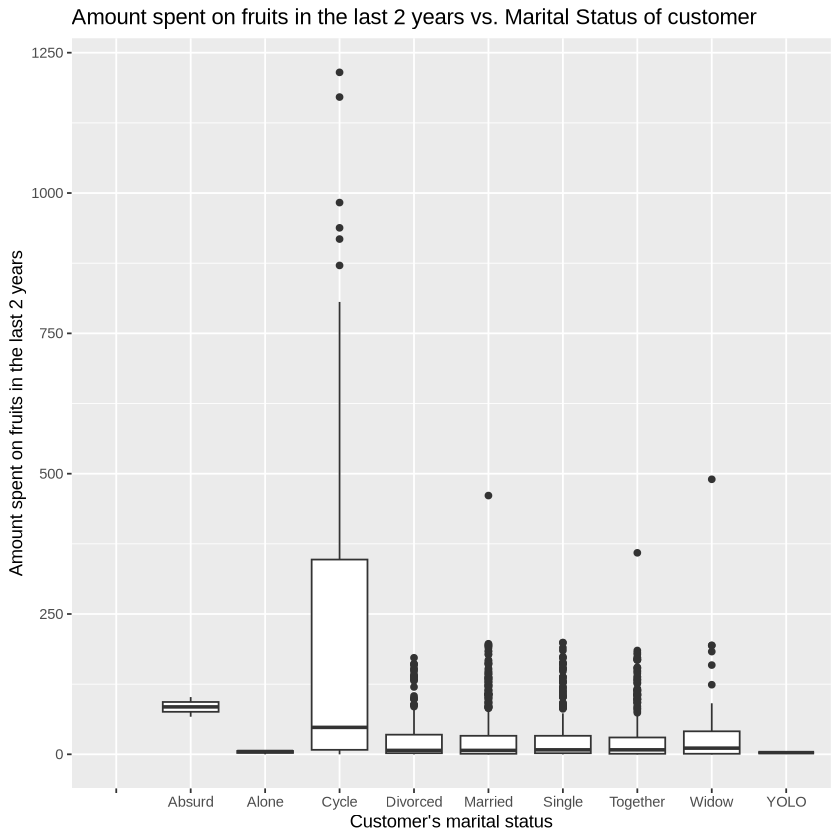

In [63]:
customer_data_marital_plot <- customer_data_var %>%
    ggplot(aes(y = MntFruits , x = Marital_Status)) +
    geom_boxplot() +
    xlab("Customer's marital status") + 
    ylab("Amount spent on fruits in the last 2 years") +
    ggtitle("Amount spent on fruits in the last 2 years vs. Marital Status of customer")
customer_data_marital_plot

This plot is relevant to address my question as it clearly states the behavior of response variable to different groups, which observation can be made easily: customer with absurd marital status tend to spend more on fruits.

# Methods and Plan

#### Method

To address my question of interest, I am planning to exploratory data analysis with boxplots as it shows median, IQR, and outliers for each of the groups. It indicates the correlation between the variables. After two boxplots are obtained, boxplots will be combined, showing interaction effects (does education impact spending on fruits differently for different marital status customer). Then I will use Poisson regression for fruit spending as it count discrete purchases and non-negative outcomes. 

1. Why is this method appropriate?
   This method is appropriate because no need to log-transform and dollar spent can be treated as counts.
   
3. Which assumptions are required, if any, to apply the method selected?

    Discrete, non-negative outcomes, mean=variance (Poisson-specific assumption), and log-linear relationship.    

5. What are the potential limitations or weaknesses of the method selected?

   Non-linearity (interactions are harder to interpret), sensitive to outliers (results can be influenced easily by outliers), and requires large samples.

